In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
import random

warnings.filterwarnings('ignore')

# 1. Data Import

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2. Data Analysis

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
init_nums = train.dtypes[train.dtypes!='object'].index
init_nums 

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
#After manually going through each columns in init_num, this is the outcome

num_countable = ['MSSubClass', 'OverallQual', 'OverallCond','BedroomAbvGr', 'KitchenAbvGr', 
                  'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

num_cols = ['LotFrontage','LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
           'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
            '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

date_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [12]:
init_cats = train.dtypes[train.dtypes == 'object'].index
init_cats

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
train[num_cols]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,0


In [14]:
train[num_cols].isnull().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
dtype: int64

- LotFontage has almost 18% of missing data.
- MasVnrArea has 8 only 8 rows missing which can be managed easily.

In [15]:
train[num_cols].isin([0]).sum()

LotFrontage         0
LotArea             0
MasVnrArea        861
BsmtFinSF1        467
BsmtFinSF2       1293
BsmtUnfSF         118
TotalBsmtSF        37
1stFlrSF            0
2ndFlrSF          829
LowQualFinSF     1434
GrLivArea           0
GarageArea         81
WoodDeckSF        761
OpenPorchSF       656
EnclosedPorch    1252
3SsnPorch        1436
ScreenPorch      1344
PoolArea         1453
MiscVal          1408
dtype: int64

- BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal has huge amount of rows filled with zeros.

In [16]:
cat_cols = list(init_cats)

In [17]:
train[cat_cols]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [18]:
train[cat_cols].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

- Alley, FireplaceQu, PolQC, Fence, MiscFeature has significant number of missing values.

In [19]:
train[num_countable]

,MSSubClass,OverallQual,OverallCond,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,60,7,5,3,1,8,0,2,1,0,2,1
1,20,6,8,3,1,6,1,2,0,1,2,0
2,60,7,5,3,1,6,1,2,1,0,2,1
3,70,7,5,3,1,7,1,3,1,0,1,0
4,60,8,5,4,1,9,1,3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,3,1,7,1,2,0,0,2,1
1456,20,6,6,3,1,7,2,2,1,0,2,0
1457,70,7,9,4,1,9,2,1,0,0,2,0
1458,20,5,6,2,1,5,0,1,1,0,1,0


In [20]:
train[num_countable].isnull().sum()

MSSubClass      0
OverallQual     0
OverallCond     0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
dtype: int64

In [21]:
train[date_cols]

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,2003,2003,2003.0,2,2008
1,1976,1976,1976.0,5,2007
2,2001,2002,2001.0,9,2008
3,1915,1970,1998.0,2,2006
4,2000,2000,2000.0,12,2008
...,...,...,...,...,...
1455,1999,2000,1999.0,8,2007
1456,1978,1988,1978.0,2,2010
1457,1941,2006,1941.0,5,2010
1458,1950,1996,1950.0,4,2010


In [22]:
train[date_cols].isnull().sum()

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
MoSold           0
YrSold           0
dtype: int64

- GarageYrBlt has 81 rows of mising value, does that mean garage is not there?

***Descriptive statistics of the numeric columns***

In [23]:
train[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.00,0.0,0.00,572.0


***Lets also have a glance of all the numeric columns and their dependencies on each other.***

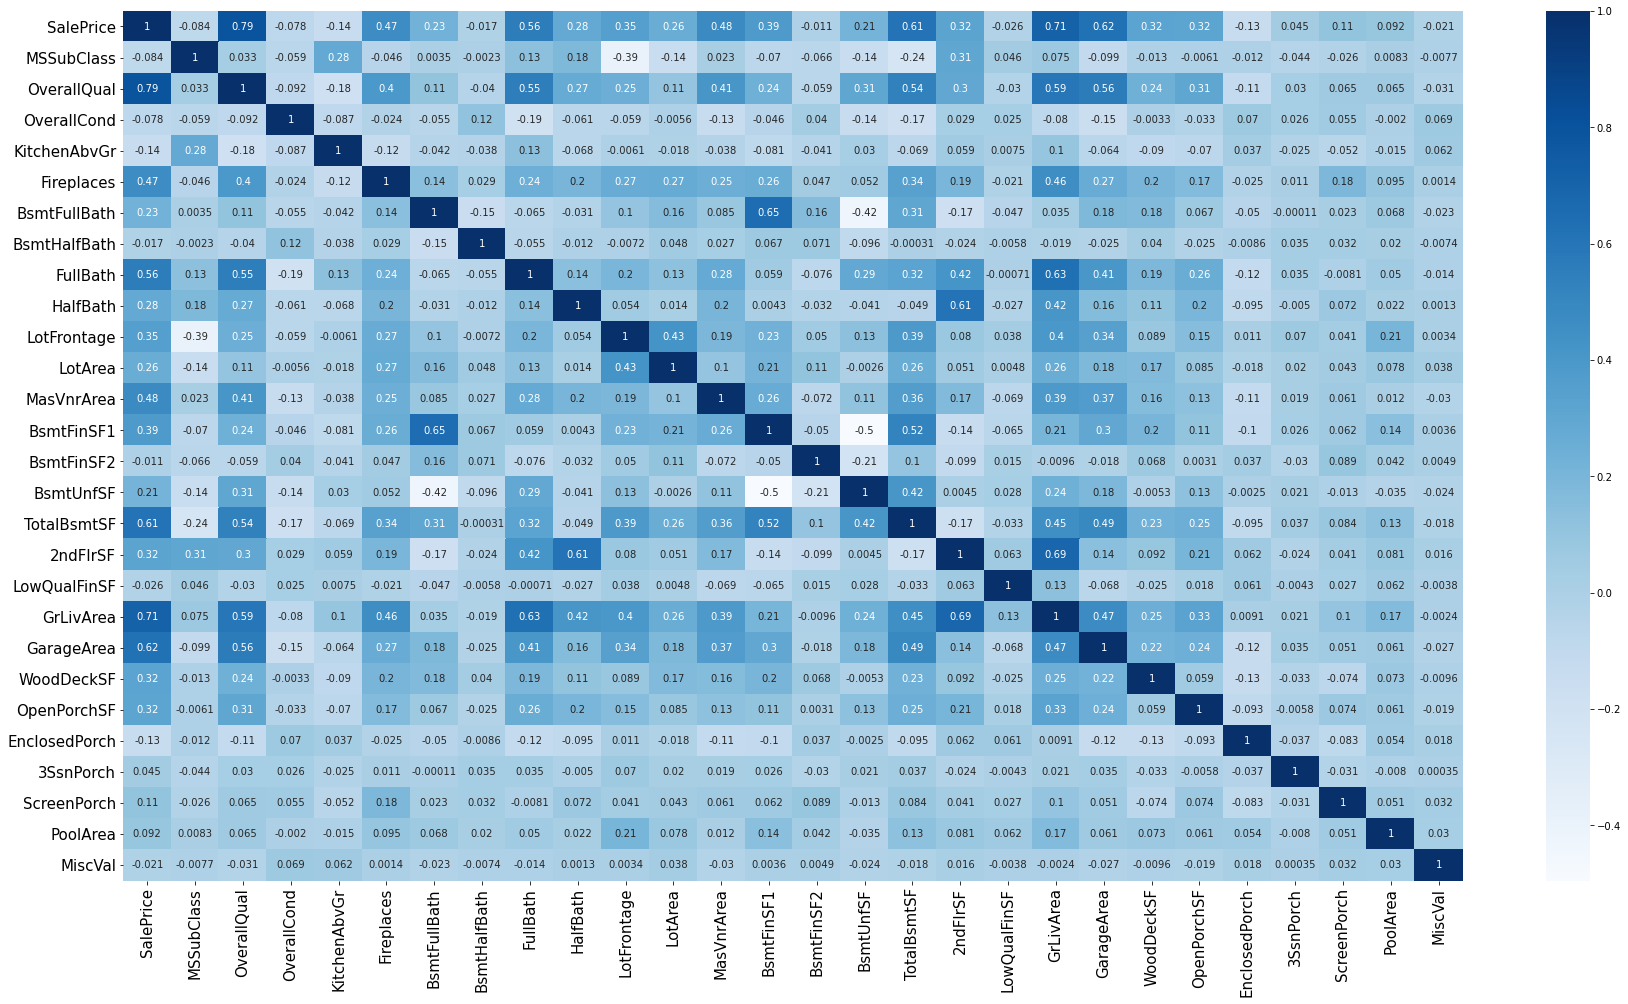

In [52]:
all_num_col = ['SalePrice'] + num_countable + num_cols

plt.figure(figsize=(30, 16))
corr = train[all_num_col].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

***Correlation exists between different features***

*High Correlation* 

- TotRmsAbvGrd vs GrLivArea - 0.83
- GarageCars vs GarageArea - 0.88
- 1stFlrSF vs TotalBsmtSF - 0.82

*Moderate Correlation*

- TotRomsAbvGrd vs BedroomAbvGr - 0.68
- GrLivArea vs 2ndFlrSF - 0.69
- BsmtFullBath vs BsmtFinSF1 - 0.65
- GrLivArea vs FullBath - 0.63
- TotRmsAbvGrd vs 2ndFlrSF - 0.62
- 2ndFlrSF vs HalfBath - 0.61
- OverallQual vs GarageCars - 0.6
- GrLivArea vs OverallQual - 0.59
- GarageArea vs OverallQual - 0.59
- 1stFlrSF vs GrLivArea - 0.57
- FullBath vs OverallQual - 0.55
- FullBath vs TotRmsAbvGrd - 0.55
- TotalBsmtSF vs OverallQual - 0.54


***Decision***

- GarageArea is sufficient to give information to give idea about Garage, hence GarageCars can be removed.
- GrLivArea can be used alone to denote living area. TotRmsAbvGrd can be removed and BedroomsAbvGr can be removed as well.
- If area of first floor depends on basement area then lets remove 1stFlrSF.

In [25]:
remove_cols = ['GarageCars', 'TotRmsAbvGrd', 'BedroomAbvGr', '1stFlrSF']

In [26]:
for col in remove_cols:
    if col in num_countable:
        num_countable.remove(col)
    if col in num_cols:
        num_cols.remove(col)

num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [27]:
num_countable

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'KitchenAbvGr',
 'Fireplaces',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath']

***Visualizing the target and each column***

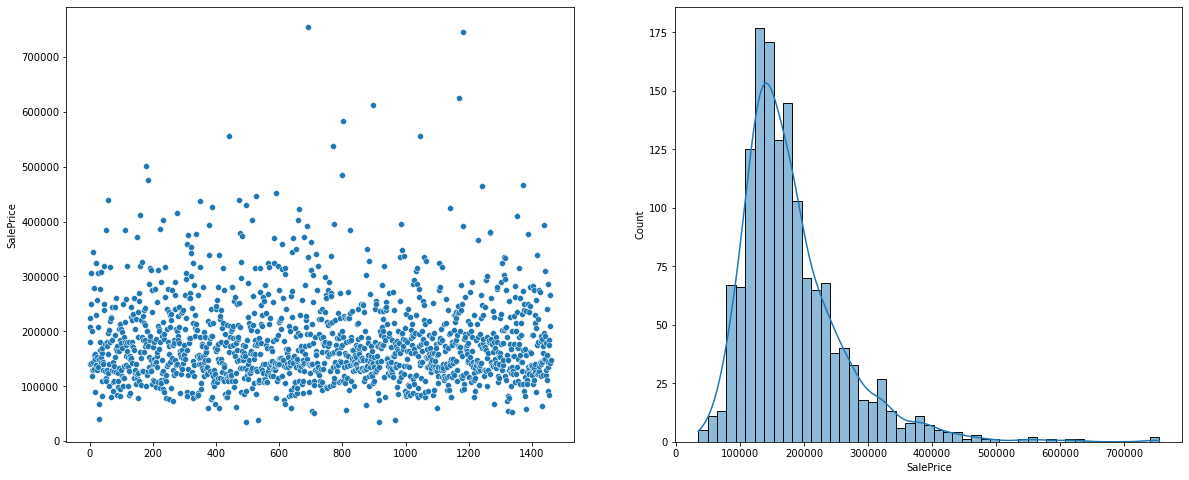

In [28]:
#Plotting the target

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(y = 'SalePrice', x = train.index, data=train, ax=ax[0])
sns.histplot(x='SalePrice', data=train, kde=True, ax=ax[1])
fig.show()

In [29]:
def dist_plot(df, columns, kind='scatter', label='SalePrice', basis=None):
    plt.figure(figsize=(20, 16))
    
    for idx, column in enumerate(columns):
        f = plt.subplot(5, 4, idx+1)
        if kind == 'scatter':
            g = sns.scatterplot(x = column, y = label, data = df, hue=basis)
        elif (kind == 'histplot'):
            g = sns.histplot(x = column, data = df, hue=basis, kde=True)
        elif (kind =='boxplot'):
            g = sns.boxplot(x = column, data=df, hue=basis)
    plt.tight_layout()
    
def count_plot():
    None

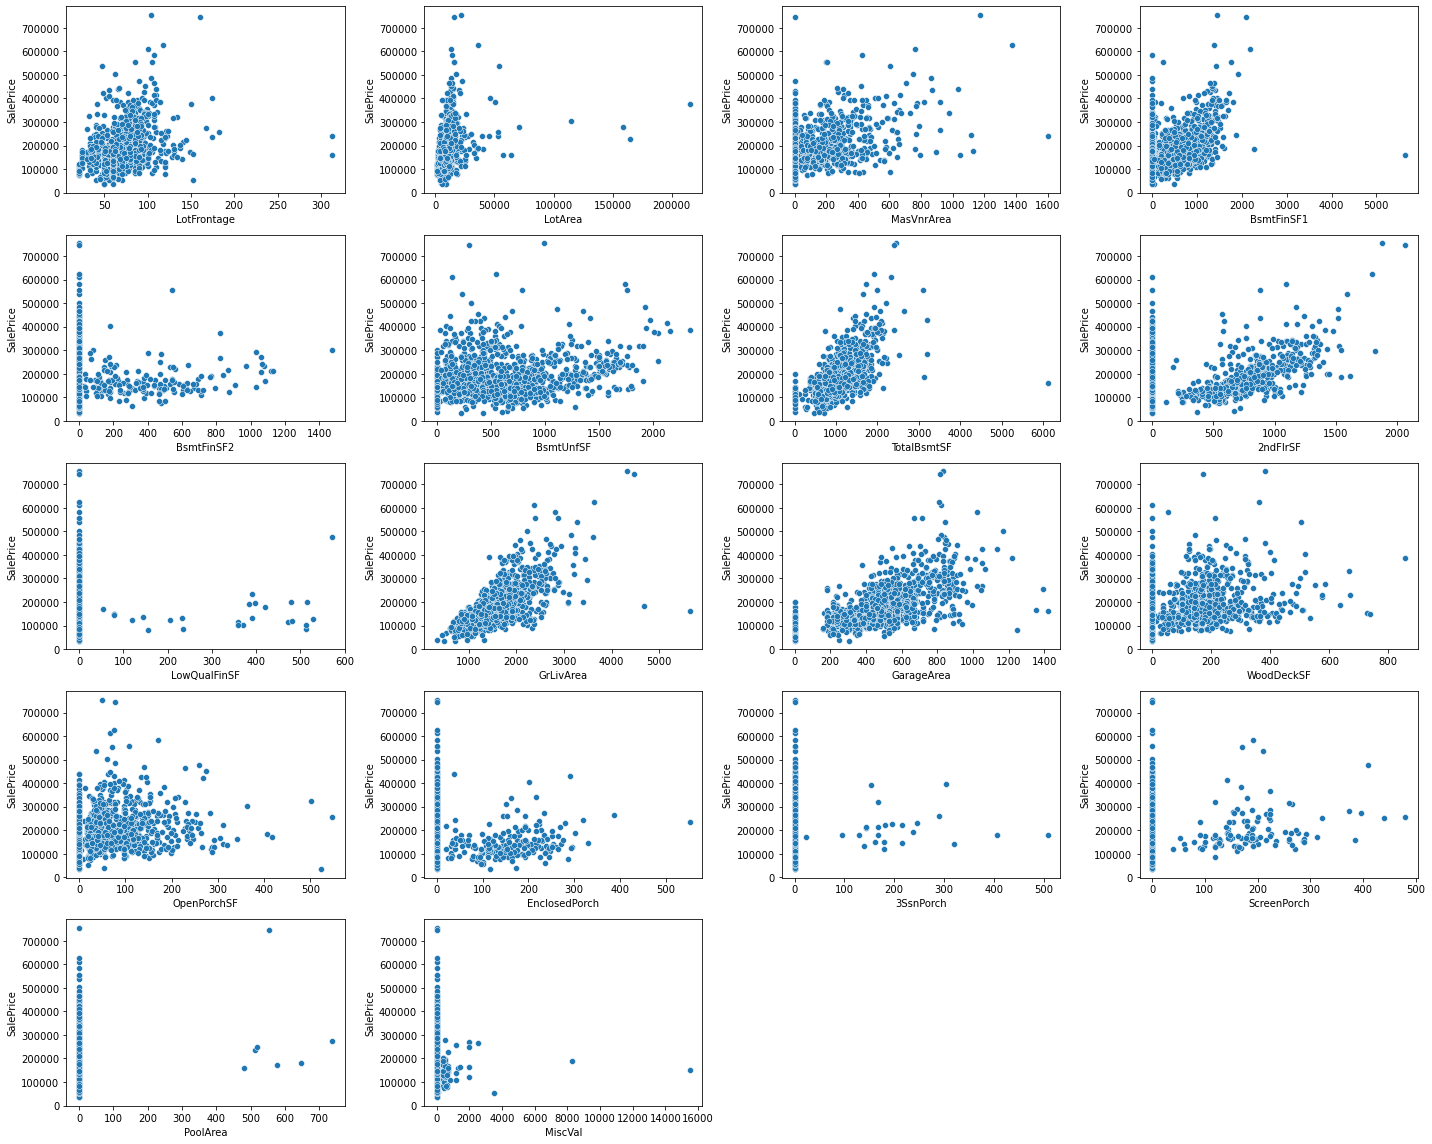

In [30]:
dist_plot(train, num_cols)

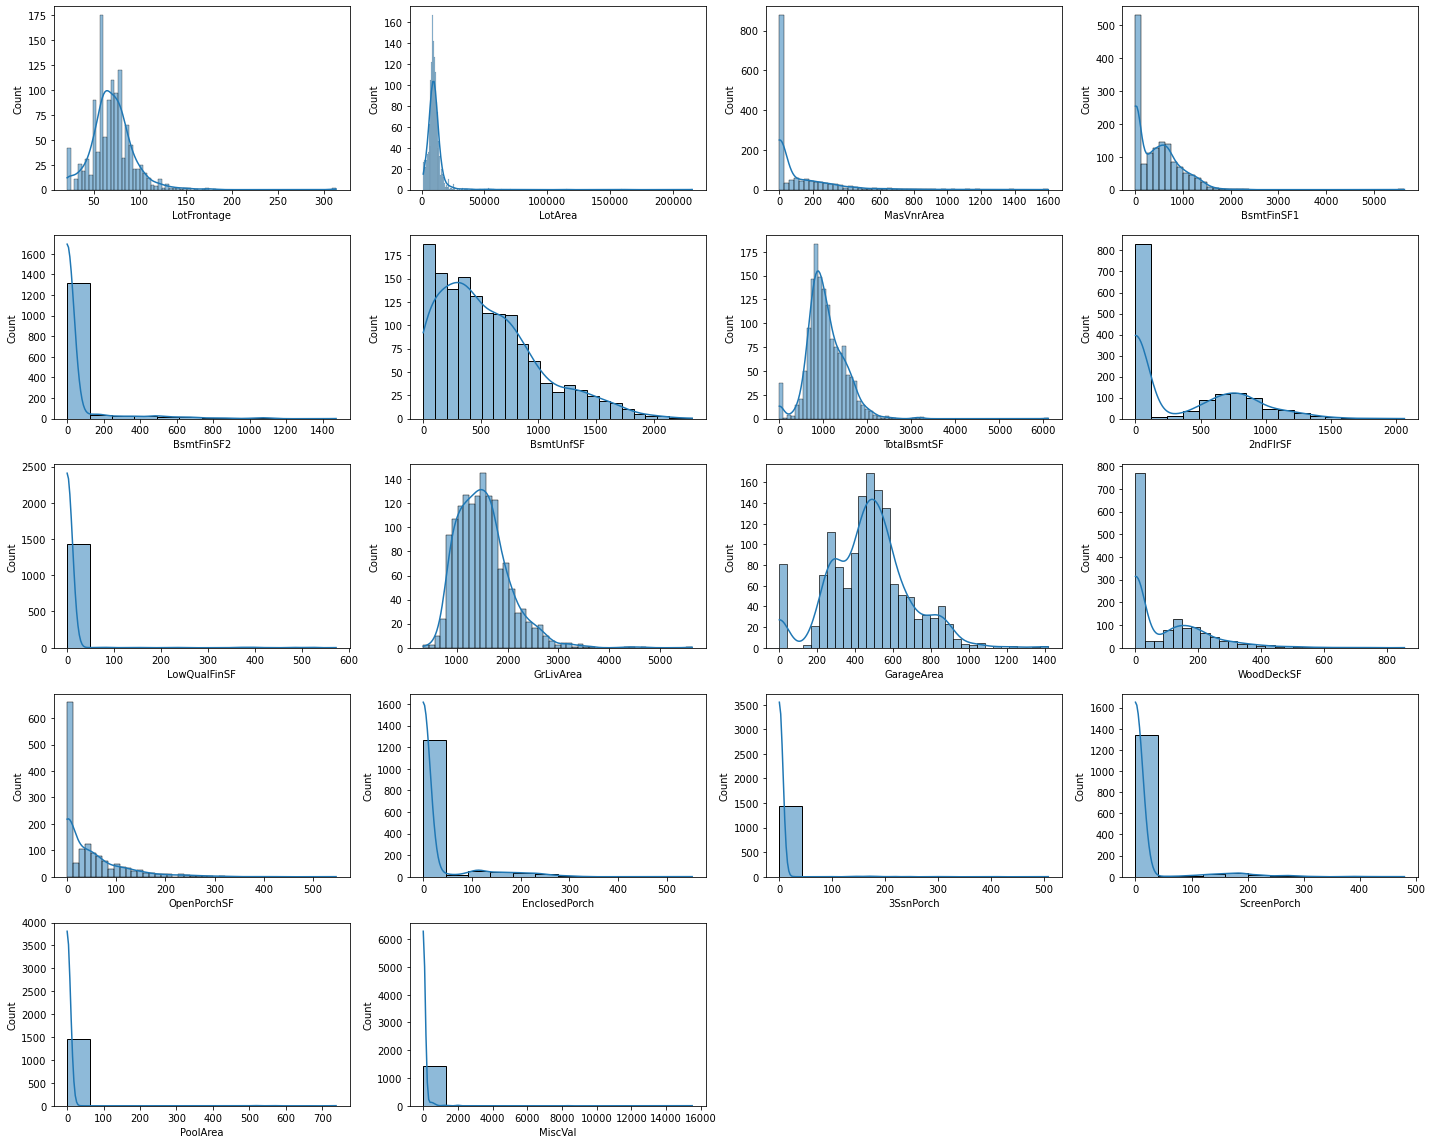

In [31]:
dist_plot(train, num_cols, kind='histplot')

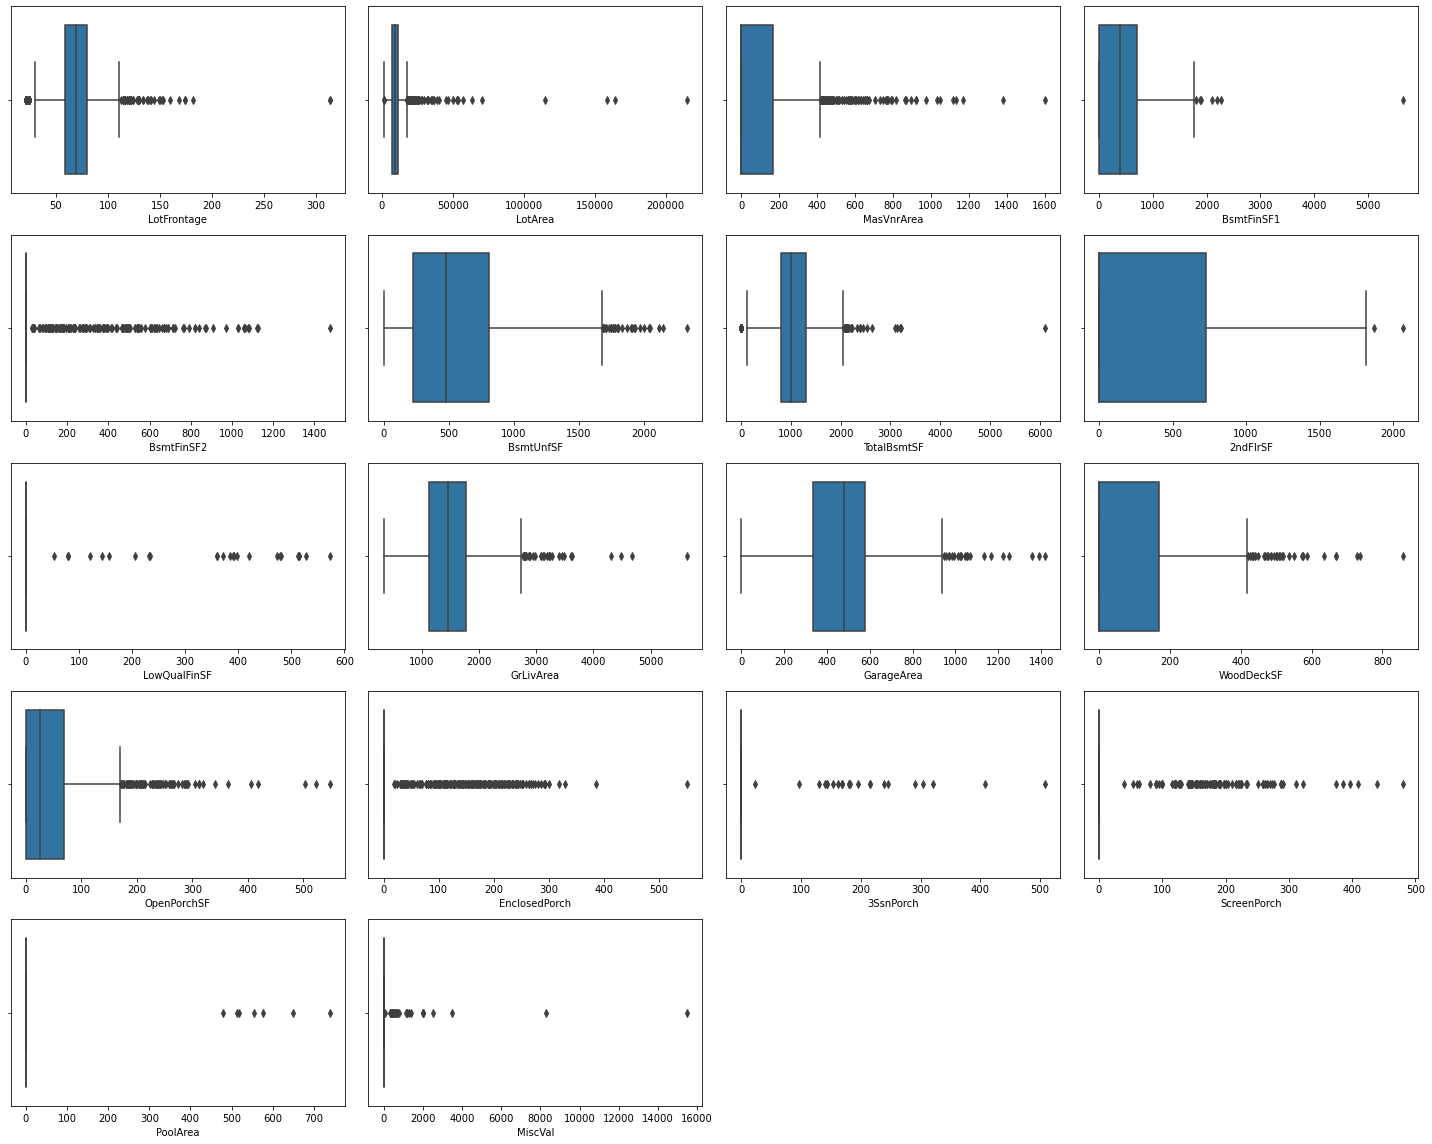

In [32]:
dist_plot(train, num_cols, kind='boxplot')

***Observations***

- MiscVal - has very few values and majority of them are zeros, do not see any specific relation with target as well. Need to decide whether we really require this column. At most, we can add a new column say 'HasSpecialFeature' and populate 0,1 while removing MiscVal.
- PoolArea - same logic as MiscVal goes for PoolArea i.e., add column HasPool & remove PoolArea
- With similar logic, lets add 3 new columns HasEnclosedPorch, Has3SsnPorch, HasScreenPorch 
- OpenPorchSF - More than 600 rows contain zero, that means roughly 800 rows has value for OpenPorchSF. Maybe create a column 'HaveOpenPorch'with (0,1) values.
- Similar logic goes for 'WoodDeckSF' i.e., remove WoodDeckSF and create 'HasWoodDeck' with (0,1)
- GarageArea seems to have a linear relationship with the target. The zeros can be replaced with the median value. We will treat the outliers seperately.
- Same logic goes for GrLivArea.
- Majority of the rows are zeros for LowQualFinSF, can we delete it?.
- 2ndFlrSF also has same thing i.e., huge number of values are zeros.
- Will keep BsmtUnfSF & TotalBsmtSF as is and treat the zeros in usual manner.
- For BsmtFinSF1, BsmtFinSF2 lets create a new column HasType1Finishing & HasType2Finishing columns
- Lets do the same as previous for MasVnrArea.
- Keeping LotArea as is. Need to do further research.

***Strategy***

1. First we will delete the unwanted columns
2. Acordingly will add the new column set for the conditions discovered.

In [59]:
#remove_cols = ['GarageCars', 'TotRmsAbvGrd', 'BedroomAbvGr', '1stFlrSF']
cols_to_del = ['MiscVal', 'PoolArea', 'EnclosedPorch', '3SsnPorch', 'OpenPorchSF', 'WoodDeckSF', 
               'LowQualFinSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'MasVnrArea']

for col in cols_to_del:
    remove_cols.append(col)
    
remove_cols

['GarageCars',
 'TotRmsAbvGrd',
 'BedroomAbvGr',
 '1stFlrSF',
 'MiscVal',
 'PoolArea',
 'EnclosedPorch',
 '3SsnPorch',
 'OpenPorchSF',
 'WoodDeckSF',
 'LowQualFinSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'MasVnrArea']

In [ ]:
new_col_rpl = {'MiscVal': 'HasSpecialFeature'}

In [55]:
t = train.copy()
t['new'] = t['OpenPorchSF'].apply(lambda x : 1 if x != 0 else 0)

In [57]:
t[['new']]

,new
0,1
1,0
2,1
3,1
4,1
...,...
1455,1
1456,0
1457,1
1458,0
